In [ ]:
""" TFDWT: Fast Discrete Wavelet Transform TensorFlow Layers.
Copyright (C) 2025 Kishore Kumar Tarafdar

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>."""

In [1]:
pwd

'/home/kkt/src'

In [2]:
!python --version

Python 3.12.7


GPU availability?

In [3]:
import tensorflow as tf
print(f"TensorFlow version {tf.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
len(gpus)

2025-03-27 20:45:45.801100: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-27 20:45:45.887912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743088545.918406    8742 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743088545.928308    8742 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-27 20:45:46.000941: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

TensorFlow version 2.18.0
Num GPUs Available:  1


1

Select one GPU

        Restrict code to use a particular GPU...

In [6]:
# # include ../dirx 
mylibpath = [
    '/home/src'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from tf_select_a_gpu import select_a_gpu

In [8]:
# select_gpu = gpus[gpu_id]
memory_limit = 8 #GB
select_a_gpu(gpus, gpu_id = 0, memory_limit=memory_limit)
# del gpu_id, select_a_gpu, select_gpu

1 Physical GPUs available 
Selected 1 Logical GPU with 8 GB memory limit


I0000 00:00:1743088691.391651    8742 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8192 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


## 1D: DWT, IDWT \& Perfect Reconstruction of sequences

In [26]:
from TFDWT3D.DWTIDWT1Dtfv1 import DWT1D, IDWT1D

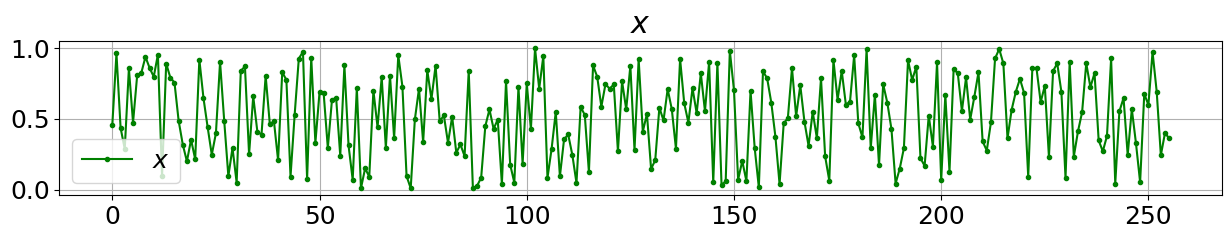

Raw x shape (256,)


In [28]:
# 1D dwt
N = 256 # length of the sequence
input_shape = (N,1)
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '18'
x = np.random.rand(input_shape[0])
# x = tmpx
plt.figure(figsize=(15,2))
plt.plot(x, 'g.-',label='$x$')
plt.legend(), plt.grid()
plt.title('$x$')
plt.show()
print(f"Raw x shape {x.shape}")


    DWT 1D 

In [30]:
mother_wavelet = 'bior3.1' # max 'db8' for lenght 16 signal
# mother_wavelet = 'haar' # max 'db8' for lenght 16 signal
# mother_wavelet = 'db10' # max 'db8' for lenght 16 signal

newx = tf.expand_dims(tf.expand_dims(x,-1),0)
print(f'x shape {newx.shape}')
dwtout = DWT1D(wave=mother_wavelet)(newx)
print(f'DWT(x) shape {dwtout.shape}, \nDWT(x) := {dwtout}')


x shape (1, 256, 1)
DWT(x) shape (1, 128, 2), 
DWT(x) := [[[ 3.8863507e-01 -4.9355060e-02]
  [ 1.2201641e+00 -2.4948129e-01]
  [ 8.9281166e-01  2.9464567e-01]
  [ 7.6542795e-01  1.8262768e-01]
  [ 1.2819138e+00  5.0471306e-02]
  [ 1.0895157e+00 -3.5791636e-02]
  [ 5.1744330e-01 -4.7216359e-01]
  [ 1.4837451e+00 -1.6964445e-01]
  [ 9.2741609e-01 -5.9117913e-02]
  [ 2.5354841e-01 -3.9465666e-02]
  [ 2.0745987e-01 -2.0057689e-01]
  [ 1.4283745e+00 -1.8481413e-01]
  [ 3.6150843e-01 -5.9701264e-02]
  [ 1.1219435e+00  2.2510421e-01]
  [ 1.9421731e-01 -9.9849790e-02]
  [ 3.6094744e-02 -2.6082379e-01]
  [ 1.7080119e+00 -1.7932951e-02]
  [ 5.1184535e-01  2.9929990e-01]
  [ 3.2979262e-01 -3.6489606e-02]
  [ 1.0378764e+00 -1.9755706e-01]
  [ 2.7620482e-01 -2.1056956e-01]
  [ 1.5972285e+00 -8.1169903e-03]
  [ 5.9728652e-02  2.0561373e-01]
  [ 1.8020959e+00  1.0599786e-01]
  [ 6.0698378e-01  5.6846857e-01]
  [ 5.1265383e-01  2.3433757e-01]
  [ 5.6631386e-01 -1.9478792e-01]
  [ 1.1740069e+00  1.8087

    IDWT 1D

Biothogonal wavelet bior3.1
IDWT(DWT(x)) shape (1, 256, 1) 
IDWT(DWT(x)) := [[[0.45765746]
  [0.96295655]
  [0.43613014]
  [0.28845757]
  [0.85674495]
  [0.4742248 ]
  [0.80840355]
  [0.82618296]
  [0.9386256 ]
  [0.8602224 ]
  [0.7982471 ]
  [0.95516753]
  [0.09588055]
  [0.89134663]
  [0.79178643]
  [0.7568538 ]
  [0.4879073 ]
  [0.31936818]
  [0.20019338]
  [0.35363433]
  [0.21512328]
  [0.91929436]
  [0.64649886]
  [0.44220322]
  [0.24714313]
  [0.39903992]
  [0.9033947 ]
  [0.48682576]
  [0.09568843]
  [0.29481837]
  [0.05077368]
  [0.8389964 ]
  [0.8714531 ]
  [0.24958792]
  [0.6601031 ]
  [0.4099028 ]
  [0.3895152 ]
  [0.8053566 ]
  [0.4641503 ]
  [0.48344785]
  [0.20835954]
  [0.83004665]
  [0.7763121 ]
  [0.09307261]
  [0.5308548 ]
  [0.926532  ]
  [0.97444993]
  [0.07499427]
  [0.9326281 ]
  [0.33160782]
  [0.6894072 ]
  [0.6804131 ]
  [0.2948715 ]
  [0.6346692 ]
  [0.65048444]
  [0.23999651]
  [0.8781716 ]
  [0.31262502]
  [0.07072844]
  [0.7195011 ]
  [0.01094078]
  [0.1508

([<matplotlib.lines.Line2D at 0x7f29d8347dd0>],
 Text(0.5, 1.0, 'reconstuction using bior3.1'))

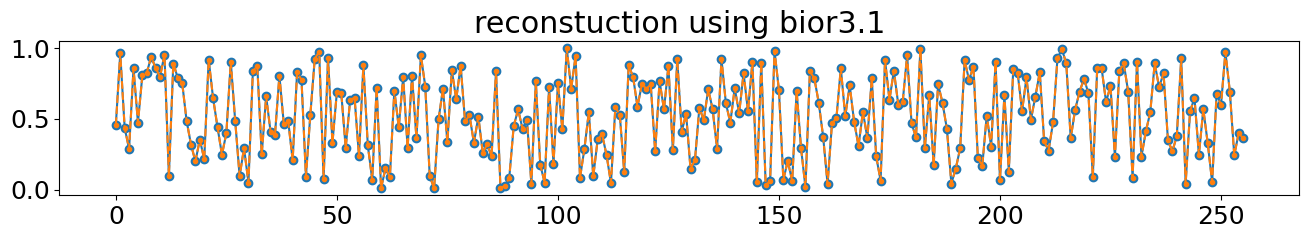

In [31]:
# print(dwtout.shape)
idwtout = IDWT1D(wave=mother_wavelet)(dwtout)
print(f'IDWT(DWT(x)) shape {idwtout.shape} \nIDWT(DWT(x)) := {idwtout}')

print(f'Check perfect reconstruction \nIDWT(DWT(x)) := {idwtout.numpy()} \n\nInput x is {x} ')

    

plt.figure(figsize=(16,2))
plt.plot(x,'o-')
plt.plot(idwtout.numpy()[0,:], '.--'), plt.title(f"reconstuction using {mother_wavelet}")

## 2D: DWT, IDWT \& Perfect Reconstruction of Images

In [15]:
from TFDWT3D.DWTIDWT2Dtfv1 import DWT2D, IDWT2D

raw x shape: (814, 800)
x shape: (512, 512)


Text(0.5, 1.0, 'input $x$')

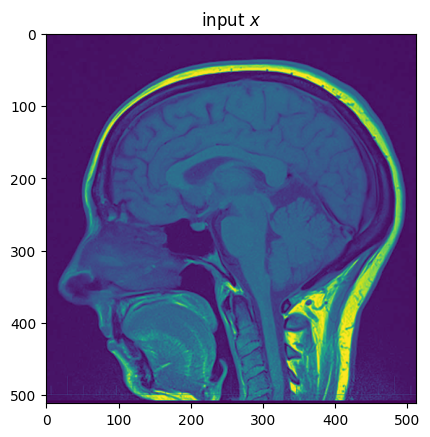

In [16]:
import cv2
x = cv2.imread(f'/home/kkt/src/brain.png',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x.shape)
x = cv2.resize(x, (512,512))
print('x shape:', x.shape)
#x = x/np.max(x)

import matplotlib.pyplot as plt
plt.imshow(x,label='$x$')
plt.title('input $x$')

    Sample input for 2D TensorFlow layer

In [17]:
x.shape
xnew = tf.expand_dims(tf.expand_dims(x, axis=-1), axis=0)
xnew.shape

xnew1 = tf.transpose(xnew, perm=[0,2,1,3])
xnew1.shape
# del x, x1

xnew = tf.cast(xnew, dtype=tf.float32)
xnew1 = tf.cast(xnew1, dtype=tf.float32)
_1 = tf.concat([xnew,xnew1,xnew],axis=-1)
_2 = tf.concat([xnew1,xnew,xnew1],axis=-1)
xnew = tf.cast(tf.concat([_1,_2], axis=0), dtype=tf.float32)
_1.shape,_2.shape, xnew.shape, _1.dtype,_2.dtype, xnew.dtype
# del _1, _2

2025-03-27 20:52:16.189151: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1193] failed to allocate 8.00GiB (8589934592 bytes) from device: RESOURCE_EXHAUSTED: : CUDA_ERROR_OUT_OF_MEMORY: out of memory


(TensorShape([1, 512, 512, 3]),
 TensorShape([1, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 tf.float32,
 tf.float32,
 tf.float32)

    DWT 2D

(2, 256, 256, 12)


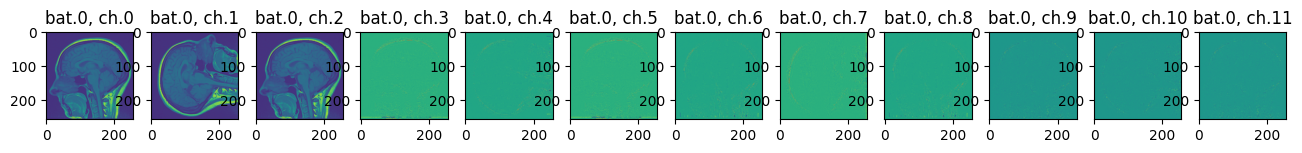

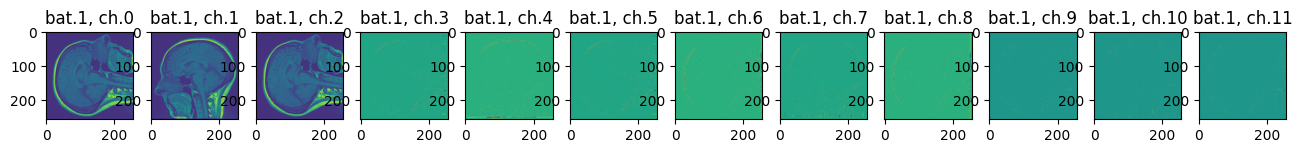

In [24]:
wave = 'haar'
wave = 'db6'
wave = 'bior3.1'
coeffs = DWT2D(wave=wave)(xnew)
print(coeffs.shape)
# import matplotlib.pyplot as plt
_ = coeffs
for b in range(_.shape[0]):
    plt.figure(figsize=(16,8))
    for c in range(_.shape[-1]):
        plt.subplot(1, _.shape[-1], c+1), plt.imshow(_[b,:,:,c]), plt.title(f'bat.{b}, ch.{c}')
    plt.show()    

    IDWT 2D

(2, 512, 512, 3) <dtype: 'float32'>


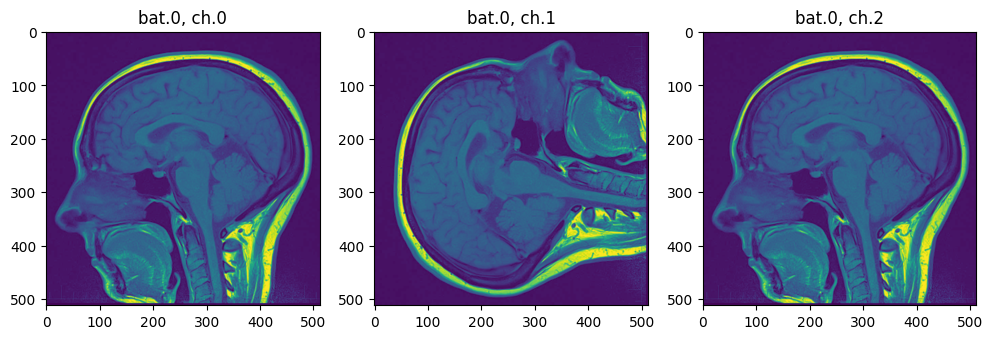

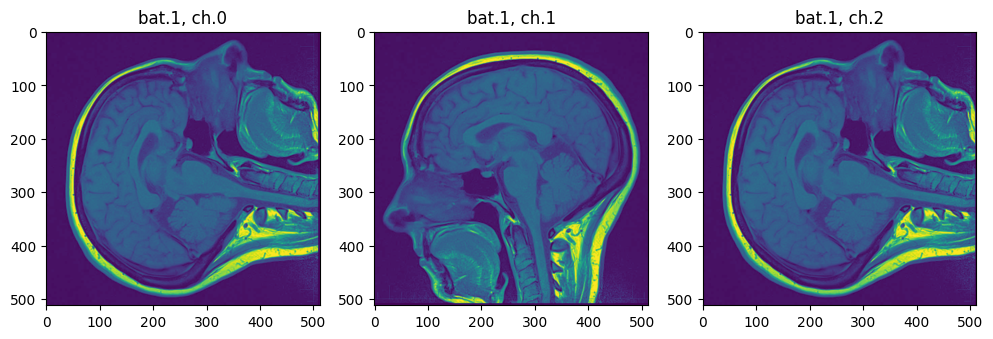

In [22]:
out = IDWT2D(wave=wave)(coeffs)
# [_.shape for _ in out]
print(out.shape, out.dtype)
# import matplotlib.pyplot as plt
_ = out
for b in range(_.shape[0]):
    plt.figure(figsize=(12,4))
    for c in range(_.shape[-1]):
        plt.subplot(1, _.shape[-1], c+1), plt.imshow(_[b,:,:,c]), plt.title(f'bat.{b}, ch.{c}')
    plt.show()